# Getting reach average shear stresses 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import topography data
P2_topo = pd.read_csv('../XS_topo/P2_topo.csv')
P3_topo = pd.read_csv('../XS_topo/P3_topo.csv')
P4_topo = pd.read_csv('../XS_topo/P4_topo.csv')
P6_topo = pd.read_csv('../XS_topo/P6_topo.csv')
# using ../ since we are going back a folder to get to the data

# import depth data and make date the index
depth_2021 = pd.read_csv('../water_depth/2021_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2022 = pd.read_csv('../water_depth/2022_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2023 = pd.read_csv('../water_depth/2023_depths.csv', index_col='Date_Time', parse_dates=True)

### Function definition - hydraulic radius

In [2]:
def get_hydraulic_radius(X, Y, WSE):
    wet_areas = []
    wet_perimeters = []
    poly_x = []
    poly_y = []

    # loop through the points of the cross-section to find wet polygon
    for i in range(len(X) - 1):
        y1, y2 = Y[i], Y[i+1]
        x1, x2 = X[i], X[i+1]

        # first, checking if we enter the water
        if (y1 >= WSE and y2 < WSE):
            # Linear interpolation to find the intersection point
            x_int1 = x1 + (WSE - y1) * (x2 - x1) / (y2 - y1)
            poly_x.append(x_int1)
            poly_y.append(WSE)
        
        # if not, we check if the first point is below the WSE
        if (y1 < WSE):
            poly_x.append(x1)
            poly_y.append(y1)
        
        # then, we check if we go out of the water. If we did, we calculate the area and store it
        if (y1 < WSE and y2 >= WSE):
            # linear interpolation to find the intersection point
            x_int2 = x1 + (WSE - y1) * (x2 - x1) / (y2 - y1)
            poly_x.append(x_int2)
            poly_y.append(WSE)

            # closing the polygon
            if len(poly_x) > 0:
                poly_x.append(poly_x[0])
                poly_y.append(poly_y[0])
            
            # calculating the area
            tempCalc1 = 0.5 * np.abs(np.dot(poly_x, np.roll(poly_y, 1)) - np.dot(poly_y, np.roll(poly_x, 1)))
            wet_areas.append(tempCalc1)

            # calculating the wet perimeter
            distances = np.sqrt(np.diff(poly_x)**2 + np.diff(poly_y)**2)
            wet_perimeters.append(np.sum(distances[:-1]))

            # resetting the polygon
            poly_x = []
            poly_y = []
    
    # return hydraulic radius, wet area, wet perimeter
    tempCalc1 = np.sum(wet_areas)
    wet_area = tempCalc1
    tempCalc2 = np.sum(wet_perimeters)
    wet_perimeter = tempCalc2
    # check if tempCalc2 is zero to avoid division by zero
    if tempCalc2 == 0:
        hydraulic_radius = float('nan')  
    else:
        hydraulic_radius = tempCalc1 / tempCalc2
    
    return hydraulic_radius, wet_area, wet_perimeter

def calculate_hydraulic_radius(topography_df, depth_timeseries, depth_location):
    X = topography_df['distance'].values
    Z = topography_df['elevation'].values
    depth = depth_timeseries['depth'].values
    times = depth_timeseries.index 

    # find the riverbed elevation at the depth measurement location
    riverbed_elevation_at_depth_location = np.interp(depth_location, X, Z)

    hyd_rad = [] 
    wet_area = []
    wet_perimeter = []

    # loop over each time step and calculate hydraulic radius
    for d in depth:
        wse = riverbed_elevation_at_depth_location + d  # wse at this time step
        hydraulic_radius_calc, wet_area_calc, wet_perimeter_calc = get_hydraulic_radius(X, Z, wse)  # calculate hydraulic radius
        hyd_rad.append(hydraulic_radius_calc)
        wet_area.append(wet_area_calc)
        wet_perimeter.append(wet_perimeter_calc)

    # create a DataFrame with time and hydraulic radius for each time step
    R_timeseries = pd.DataFrame({
        'time': times,
        'hydraulic_radius': hyd_rad,
        'wet_area': wet_area,
        'wet_perimeter': wet_perimeter
    }).set_index('time')
    return R_timeseries, 

Prepping data to process through functions

In [3]:
# 2021 piezometers
P2_2021_depth = pd.DataFrame(depth_2021['P2']) 
P2_2021_depth.columns = ['depth'] # change the column name to 'depth'
P3_2021_depth = pd.DataFrame(depth_2021['P3'])
P3_2021_depth.columns = ['depth']
P4_2021_depth = pd.DataFrame(depth_2021['P4'])
P4_2021_depth.columns = ['depth']
P6_2021_depth = pd.DataFrame(depth_2021['P6'])
P6_2021_depth.columns = ['depth']

# 2022 piezometers
P2_2022_depth = pd.DataFrame(depth_2022['P2'])
P2_2022_depth.columns = ['depth']
P3_2022_depth = pd.DataFrame(depth_2022['P3'])
P3_2022_depth.columns = ['depth']
P4_2022_depth = pd.DataFrame(depth_2022['P4'])
P4_2022_depth.columns = ['depth']
P6_2022_depth = pd.DataFrame(depth_2022['P6'])
P6_2022_depth.columns = ['depth']

# 2023 piezometers
P2_2023_depth = pd.DataFrame(depth_2023['P2'])
P2_2023_depth.columns = ['depth']
P3_2023_depth = pd.DataFrame(depth_2023['P3'])
P3_2023_depth.columns = ['depth']
P4_2023_depth = pd.DataFrame(depth_2023['P4'])
P4_2023_depth.columns = ['depth']
P6_2023_depth = pd.DataFrame(depth_2023['P6'])
P6_2023_depth.columns = ['depth']

P2_2022_depth

,depth
Date_Time,
2022-03-01 00:00:00,0.120852
2022-03-01 00:15:00,0.119627
2022-03-01 00:30:00,0.118516
2022-03-01 00:45:00,0.117518
2022-03-01 01:00:00,0.116634
...,...
2022-09-16 23:00:00,0.116895
2022-09-16 23:15:00,0.118644
2022-09-16 23:30:00,0.115145


### Hydraulic radius and area by cross section

In [4]:
# 2021 hydraulic radius
P2_2021 = calculate_hydraulic_radius(P2_topo, P2_2021_depth, 0.7)
P3_2021 = calculate_hydraulic_radius(P3_topo, P3_2021_depth, 0.6)
P4_2021 = calculate_hydraulic_radius(P4_topo, P4_2021_depth, 2.5)
P6_2021 = calculate_hydraulic_radius(P6_topo, P6_2021_depth, 1.7)


# 2022 hydraulic radius
P2_2022 = calculate_hydraulic_radius(P2_topo, P2_2022_depth, 0.7)
P3_2022 = calculate_hydraulic_radius(P3_topo, P3_2022_depth, 0.6)
P4_2022 = calculate_hydraulic_radius(P4_topo, P4_2022_depth, 2.5)
P6_2022 = calculate_hydraulic_radius(P6_topo, P6_2022_depth, 1.7)

# 2023 hydraulic radius
P2_2023 = calculate_hydraulic_radius(P2_topo, P2_2023_depth, 0.7)
P3_2023 = calculate_hydraulic_radius(P3_topo, P3_2023_depth, 0.6)
P4_2023 = calculate_hydraulic_radius(P4_topo, P4_2023_depth, 2.5)
P6_2023 = calculate_hydraulic_radius(P6_topo, P6_2023_depth, 1.7)


In [5]:
P3_2023

(                     hydraulic_radius  wet_area  wet_perimeter
 time                                                          
 2023-03-01 00:00:00          0.073638  0.151567       2.058277
 2023-03-01 00:15:00          0.075009  0.157268       2.096652
 2023-03-01 00:30:00          0.076836  0.163057       2.122139
 2023-03-01 00:45:00          0.076836  0.163057       2.122139
 2023-03-01 01:00:00          0.075020  0.157301       2.096785
 ...                               ...       ...            ...
 2023-09-17 22:45:00          0.067123  0.087253       1.299896
 2023-09-17 23:00:00          0.066917  0.083549       1.248549
 2023-09-17 23:15:00          0.066917  0.083549       1.248549
 2023-09-17 23:30:00          0.062841  0.091147       1.450429
 2023-09-17 23:45:00          0.067123  0.087253       1.299896
 
 [19296 rows x 3 columns],)

In [6]:
# extract hydraulic radius column from each tuple and renaming it
hydraulic_radius_2021 = pd.DataFrame({
    'P2': P2_2021[0]['hydraulic_radius'],
    'P3': P3_2021[0]['hydraulic_radius'],
    'P4': P4_2021[0]['hydraulic_radius'],
    'P6': P6_2021[0]['hydraulic_radius']
})
hydraulic_radius_2022 = pd.DataFrame({
    'P2': P2_2022[0]['hydraulic_radius'],
    'P3': P3_2022[0]['hydraulic_radius'],
    'P4': P4_2022[0]['hydraulic_radius'],
    'P6': P6_2022[0]['hydraulic_radius']
})
hydraulic_radius_2023 = pd.DataFrame({
    'P2': P2_2023[0]['hydraulic_radius'],
    'P3': P3_2023[0]['hydraulic_radius'],
    'P4': P4_2023[0]['hydraulic_radius'],
    'P6': P6_2023[0]['hydraulic_radius']
})

# extract wet area column from each tuple and renaming it
wet_area_2021 = pd.DataFrame({
    'P2': P2_2021[0]['wet_area'],
    'P3': P3_2021[0]['wet_area'],
    'P4': P4_2021[0]['wet_area'],
    'P6': P6_2021[0]['wet_area']
})
wet_area_2022 = pd.DataFrame({
    'P2': P2_2022[0]['wet_area'],
    'P3': P3_2022[0]['wet_area'],
    'P4': P4_2022[0]['wet_area'],
    'P6': P6_2022[0]['wet_area']
})
wet_area_2023 = pd.DataFrame({
    'P2': P2_2023[0]['wet_area'],
    'P3': P3_2023[0]['wet_area'],
    'P4': P4_2023[0]['wet_area'],
    'P6': P6_2023[0]['wet_area']
})
wet_area_2023

,P2,P3,P4,P6
time,,,,
2023-03-01 00:00:00,0.168611,0.151567,0.117108,0.072868
2023-03-01 00:15:00,0.172527,0.157268,0.118891,0.074193
2023-03-01 00:30:00,0.176475,0.163057,0.123894,0.075437
2023-03-01 00:45:00,0.176475,0.163057,0.120119,0.076598
2023-03-01 01:00:00,0.172550,0.157301,0.120119,0.077677
...,...,...,...,...
2023-09-17 22:45:00,0.119906,0.087253,0.119864,0.052809
2023-09-17 23:00:00,0.116630,0.083549,0.117136,0.051001
2023-09-17 23:15:00,0.116630,0.083549,0.117136,0.051001


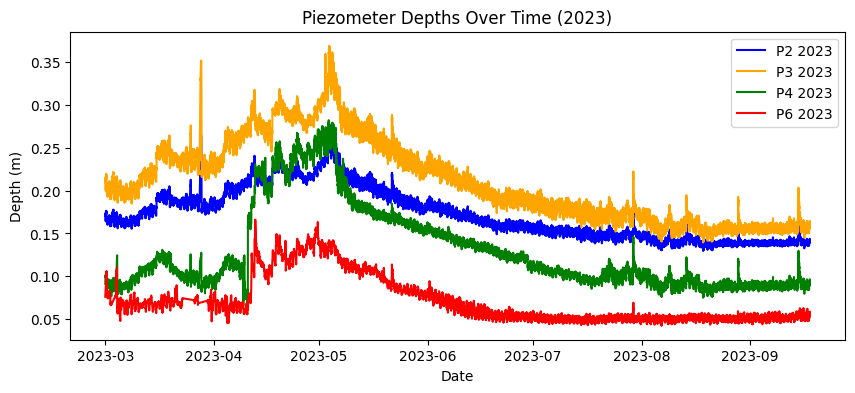

In [7]:
# plot depth over time
plt.figure(figsize=(10, 4))
plt.plot(depth_2023.index, depth_2023['P2'], label='P2 2023', color='blue')
plt.plot(depth_2023.index, depth_2023['P3'], label='P3 2023', color='orange')
plt.plot(depth_2023.index, depth_2023['P4'], label='P4 2023', color='green')
plt.plot(depth_2023.index, depth_2023['P6'], label='P6 2023', color='red')
plt.xlabel('Date')
plt.ylabel('Depth (m)')
plt.title('Piezometer Depths Over Time (2023)')
plt.legend()
plt.show()

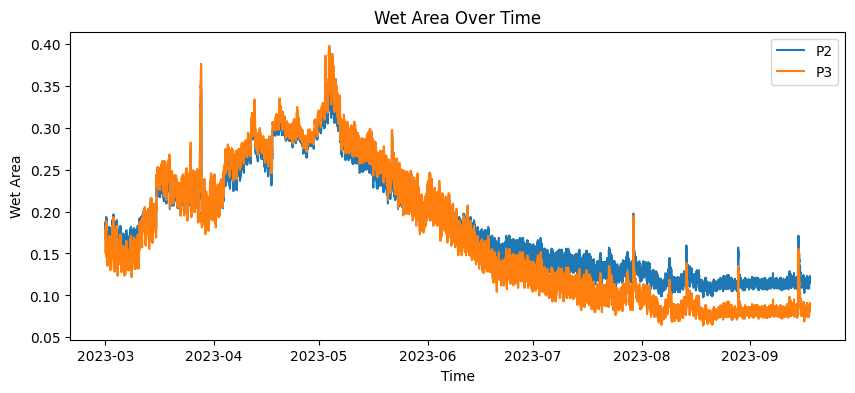

In [8]:
# plot wet area over time
plt.figure(figsize=(10, 4))
plt.plot(wet_area_2023.index, wet_area_2023['P2'], label='P2')
plt.plot(wet_area_2023.index, wet_area_2023['P3'], label='P3')
plt.xlabel('Time')
plt.ylabel('Wet Area')
plt.title('Wet Area Over Time')
plt.legend()
plt.show()

### Reach average velocity

Getting Discharge from P3 depth

In [9]:
###     original rating curve with linear cap ###
def calculate_discharge(depth): 
    if depth > 0.19682911:
        return 0.5757 * depth*100 - 10.7 # multiplying by 100 to convert m to cm
    else:
        return 0.000000006 * (depth*100)** 6.1991 

depth_2021['Q'] = depth_2021['P3'].apply(calculate_discharge)
depth_2022['Q'] = depth_2022['P3'].apply(calculate_discharge)
depth_2023['Q'] = depth_2023['P3'].apply(calculate_discharge)

# discharge dataframes - discharge is in cfs, need to convert to m3/s
discharge_2021 = depth_2021[['Q']]*0.028316847
discharge_2022 = depth_2022[['Q']]*0.028316847
discharge_2023 = depth_2023[['Q']]*0.028316847
discharge_2023

,Q
Date_Time,
2023-03-01 00:00:00,0.025262
2023-03-01 00:15:00,0.029977
2023-03-01 00:30:00,0.034701
2023-03-01 00:45:00,0.034701
2023-03-01 01:00:00,0.030004
...,...
2023-09-17 22:45:00,0.005250
2023-09-17 23:00:00,0.004656
2023-09-17 23:15:00,0.004656


Plotting Q vs R for each piezometer

In [10]:
# merge discharge with hydraulic radius dataframes
hydraulic_radius_Q_2021 = pd.merge(hydraulic_radius_2021, discharge_2021, left_index=True, right_index=True, how='inner')
hydraulic_radius_Q_2022 = pd.merge(hydraulic_radius_2022, discharge_2022, left_index=True, right_index=True, how='inner')
hydraulic_radius_Q_2023 = pd.merge(hydraulic_radius_2023, discharge_2023, left_index=True, right_index=True, how='inner')

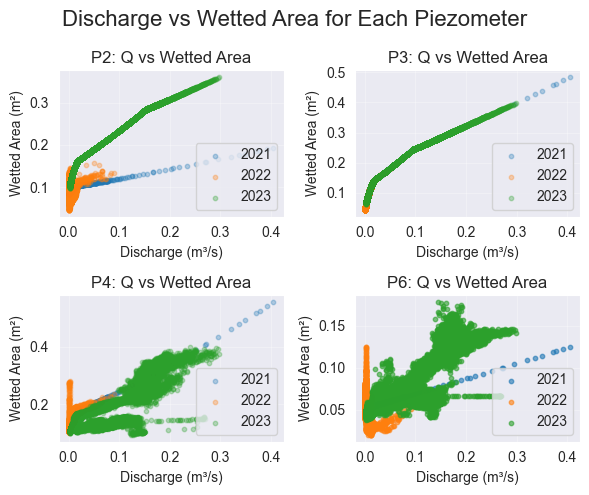

In [38]:
# Create Q vs Wetted Area plots for each piezometer
fig, axes = plt.subplots(2, 2, figsize=(6, 5))
fig.suptitle('Discharge vs Wetted Area for Each Piezometer', fontsize=16)

# P2 plot
axes[0, 0].scatter(hydraulic_radius_Q_2021['Q'], wet_area_2021['P2'], alpha=0.3, label='2021', s=10)
axes[0, 0].scatter(hydraulic_radius_Q_2022['Q'], wet_area_2022['P2'], alpha=0.3, label='2022', s=10)
axes[0, 0].scatter(hydraulic_radius_Q_2023['Q'], wet_area_2023['P2'], alpha=0.3, label='2023', s=10)
axes[0, 0].set_xlabel('Discharge (m³/s)')
axes[0, 0].set_ylabel('Wetted Area (m²)')
axes[0, 0].set_title('P2: Q vs Wetted Area')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# P3 plot
axes[0, 1].scatter(hydraulic_radius_Q_2021['Q'], wet_area_2021['P3'], alpha=0.3, label='2021', s=10)
axes[0, 1].scatter(hydraulic_radius_Q_2022['Q'], wet_area_2022['P3'], alpha=0.3, label='2022', s=10)
axes[0, 1].scatter(hydraulic_radius_Q_2023['Q'], wet_area_2023['P3'], alpha=0.3, label='2023', s=10)
axes[0, 1].set_xlabel('Discharge (m³/s)')
axes[0, 1].set_ylabel('Wetted Area (m²)')
axes[0, 1].set_title('P3: Q vs Wetted Area')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# P4 plot
axes[1, 0].scatter(hydraulic_radius_Q_2021['Q'], wet_area_2021['P4'], alpha=0.3, label='2021', s=10)
axes[1, 0].scatter(hydraulic_radius_Q_2022['Q'], wet_area_2022['P4'], alpha=0.3, label='2022', s=10)
axes[1, 0].scatter(hydraulic_radius_Q_2023['Q'], wet_area_2023['P4'], alpha=0.3, label='2023', s=10)
axes[1, 0].set_xlabel('Discharge (m³/s)')
axes[1, 0].set_ylabel('Wetted Area (m²)')
axes[1, 0].set_title('P4: Q vs Wetted Area')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# P6 plot
axes[1, 1].scatter(hydraulic_radius_Q_2021['Q'], wet_area_2021['P6'], alpha=0.6, label='2021', s=10)
axes[1, 1].scatter(hydraulic_radius_Q_2022['Q'], wet_area_2022['P6'], alpha=0.6, label='2022', s=10)
axes[1, 1].scatter(hydraulic_radius_Q_2023['Q'], wet_area_2023['P6'], alpha=0.6, label='2023', s=10)
axes[1, 1].set_xlabel('Discharge (m³/s)')
axes[1, 1].set_ylabel('Wetted Area (m²)')
axes[1, 1].set_title('P6: Q vs Wetted Area')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

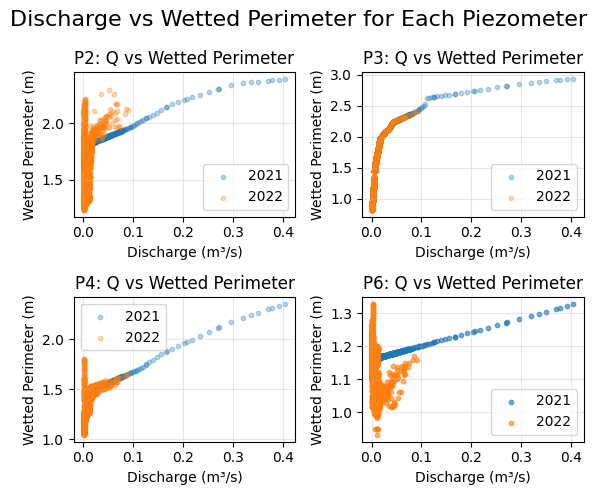

In [12]:
# Create Q vs Wetted Perimeter plots for each piezometer
# First need to extract wet perimeter data from the tuples
wet_perimeter_2021 = pd.DataFrame({
    'P2': P2_2021[0]['wet_perimeter'],
    'P3': P3_2021[0]['wet_perimeter'],
    'P4': P4_2021[0]['wet_perimeter'],
    'P6': P6_2021[0]['wet_perimeter']
})
wet_perimeter_2022 = pd.DataFrame({
    'P2': P2_2022[0]['wet_perimeter'],
    'P3': P3_2022[0]['wet_perimeter'],
    'P4': P4_2022[0]['wet_perimeter'],
    'P6': P6_2022[0]['wet_perimeter']
})
wet_perimeter_2023 = pd.DataFrame({
    'P2': P2_2023[0]['wet_perimeter'],
    'P3': P3_2023[0]['wet_perimeter'],
    'P4': P4_2023[0]['wet_perimeter'],
    'P6': P6_2023[0]['wet_perimeter']
})

fig, axes = plt.subplots(2, 2, figsize=(6, 5))
fig.suptitle('Discharge vs Wetted Perimeter for Each Piezometer', fontsize=16)

# P2 plot
axes[0, 0].scatter(hydraulic_radius_Q_2021['Q'], wet_perimeter_2021['P2'], alpha=0.3, label='2021', s=10)
axes[0, 0].scatter(hydraulic_radius_Q_2022['Q'], wet_perimeter_2022['P2'], alpha=0.3, label='2022', s=10)
#axes[0, 0].scatter(hydraulic_radius_Q_2023['Q'], wet_perimeter_2023['P2'], alpha=0.3, label='2023', s=10)
axes[0, 0].set_xlabel('Discharge (m³/s)')
axes[0, 0].set_ylabel('Wetted Perimeter (m)')
axes[0, 0].set_title('P2: Q vs Wetted Perimeter')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# P3 plot
axes[0, 1].scatter(hydraulic_radius_Q_2021['Q'], wet_perimeter_2021['P3'], alpha=0.3, label='2021', s=10)
axes[0, 1].scatter(hydraulic_radius_Q_2022['Q'], wet_perimeter_2022['P3'], alpha=0.3, label='2022', s=10)
#axes[0, 1].scatter(hydraulic_radius_Q_2023['Q'], wet_perimeter_2023['P3'], alpha=0.3, label='2023', s=10)
axes[0, 1].set_xlabel('Discharge (m³/s)')
axes[0, 1].set_ylabel('Wetted Perimeter (m)')
axes[0, 1].set_title('P3: Q vs Wetted Perimeter')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# P4 plot
axes[1, 0].scatter(hydraulic_radius_Q_2021['Q'], wet_perimeter_2021['P4'], alpha=0.3, label='2021', s=10)
axes[1, 0].scatter(hydraulic_radius_Q_2022['Q'], wet_perimeter_2022['P4'], alpha=0.3, label='2022', s=10)
#axes[1, 0].scatter(hydraulic_radius_Q_2023['Q'], wet_perimeter_2023['P4'], alpha=0.3, label='2023', s=10)
axes[1, 0].set_xlabel('Discharge (m³/s)')
axes[1, 0].set_ylabel('Wetted Perimeter (m)')
axes[1, 0].set_title('P4: Q vs Wetted Perimeter')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# P6 plot
axes[1, 1].scatter(hydraulic_radius_Q_2021['Q'], wet_perimeter_2021['P6'], alpha=0.6, label='2021', s=10)
axes[1, 1].scatter(hydraulic_radius_Q_2022['Q'], wet_perimeter_2022['P6'], alpha=0.6, label='2022', s=10)
#axes[1, 1].scatter(hydraulic_radius_Q_2023['Q'], wet_perimeter_2023['P6'], alpha=0.6, label='2023', s=10)
axes[1, 1].set_xlabel('Discharge (m³/s)')
axes[1, 1].set_ylabel('Wetted Perimeter (m)')
axes[1, 1].set_title('P6: Q vs Wetted Perimeter')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

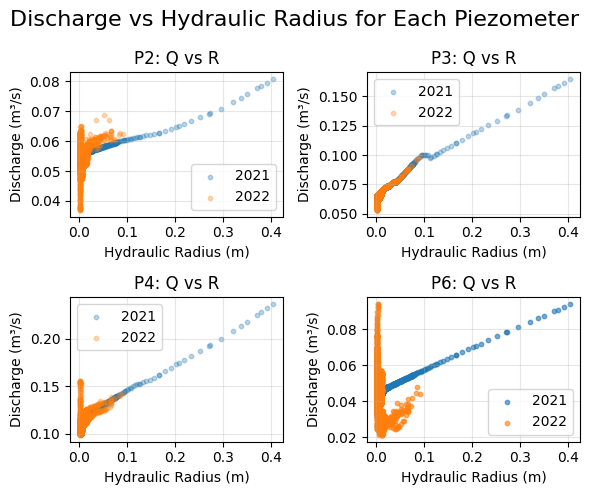

In [13]:
# Create Q vs R plots for each piezometer
fig, axes = plt.subplots(2, 2, figsize=(6, 5))
fig.suptitle('Discharge vs Hydraulic Radius for Each Piezometer', fontsize=16)

# P2 plot
axes[0, 0].scatter(hydraulic_radius_Q_2021['Q'], hydraulic_radius_Q_2021['P2'], alpha=0.3, label='2021', s=10)
axes[0, 0].scatter(hydraulic_radius_Q_2022['Q'], hydraulic_radius_Q_2022['P2'], alpha=0.3, label='2022', s=10)
#axes[0, 0].scatter(hydraulic_radius_Q_2023['Q'], hydraulic_radius_Q_2023['P2'], alpha=0.3, label='2023', s=10)
axes[0, 0].set_xlabel('Hydraulic Radius (m)')
axes[0, 0].set_ylabel('Discharge (m³/s)')
axes[0, 0].set_title('P2: Q vs R')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# P3 plot
axes[0, 1].scatter(hydraulic_radius_Q_2021['Q'], hydraulic_radius_Q_2021['P3'], alpha=0.3, label='2021', s=10)
axes[0, 1].scatter(hydraulic_radius_Q_2022['Q'], hydraulic_radius_Q_2022['P3'], alpha=0.3, label='2022', s=10)
#axes[0, 1].scatter(hydraulic_radius_Q_2023['Q'], hydraulic_radius_Q_2023['P3'], alpha=0.3, label='2023', s=10)
axes[0, 1].set_xlabel('Hydraulic Radius (m)')
axes[0, 1].set_ylabel('Discharge (m³/s)')
axes[0, 1].set_title('P3: Q vs R')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# P4 plot
axes[1, 0].scatter(hydraulic_radius_Q_2021['Q'], hydraulic_radius_Q_2021['P4'], alpha=0.3, label='2021', s=10)
axes[1, 0].scatter(hydraulic_radius_Q_2022['Q'], hydraulic_radius_Q_2022['P4'], alpha=0.3, label='2022', s=10)
#axes[1, 0].scatter(hydraulic_radius_Q_2023['Q'], hydraulic_radius_Q_2023['P4'], alpha=0.3, label='2023', s=10)
axes[1, 0].set_xlabel('Hydraulic Radius (m)')
axes[1, 0].set_ylabel('Discharge (m³/s)')
axes[1, 0].set_title('P4: Q vs R')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# P6 plot
axes[1, 1].scatter(hydraulic_radius_Q_2021['Q'], hydraulic_radius_Q_2021['P6'], alpha=0.6, label='2021', s=10)
axes[1, 1].scatter(hydraulic_radius_Q_2022['Q'], hydraulic_radius_Q_2022['P6'], alpha=0.6, label='2022', s=10)
#axes[1, 1].scatter(hydraulic_radius_Q_2023['Q'], hydraulic_radius_Q_2023['P6'], alpha=0.6, label='2023', s=10)
axes[1, 1].set_xlabel('Hydraulic Radius (m)')
axes[1, 1].set_ylabel('Discharge (m³/s)')
axes[1, 1].set_title('P6: Q vs R')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Correlations between Q and R

In [14]:
# Correlations for 2021
print("2021 Correlations:")
print("P2:", hydraulic_radius_Q_2021[['Q','P2']].corr().iloc[0,1])
print("P3:", hydraulic_radius_Q_2021[['Q','P3']].corr().iloc[0,1])
print("P4:", hydraulic_radius_Q_2021[['Q','P4']].corr().iloc[0,1])
print("P6:", hydraulic_radius_Q_2021[['Q','P6']].corr().iloc[0,1])

# Correlations for 2022
print("\n2022 Correlations:")
print("P2:", hydraulic_radius_Q_2022[['Q','P2']].corr().iloc[0,1])
print("P3:", hydraulic_radius_Q_2022[['Q','P3']].corr().iloc[0,1])
print("P4:", hydraulic_radius_Q_2022[['Q','P4']].corr().iloc[0,1])
print("P6:", hydraulic_radius_Q_2022[['Q','P6']].corr().iloc[0,1])

# Correlations for 2023
print("\n2023 Correlations:")
print("P2:", hydraulic_radius_Q_2023[['Q','P2']].corr().iloc[0,1])
print("P3:", hydraulic_radius_Q_2023[['Q','P3']].corr().iloc[0,1])
print("P4:", hydraulic_radius_Q_2023[['Q','P4']].corr().iloc[0,1])
print("P6:", hydraulic_radius_Q_2023[['Q','P6']].corr().iloc[0,1])

2021 Correlations:
P2: 0.8503519346276274
P3: 0.9512540533194839
P4: 0.8446213680789929
P6: 0.7704517813756901

2022 Correlations:
P2: 0.21722334977825275
P3: 0.8193364736884667
P4: 0.7105531039802668
P6: -0.5313063582040789

2023 Correlations:
P2: 0.9857220456337498
P3: 0.9864067363175063
P4: 0.8606477704064581
P6: 0.9137305779821406


Calculate velocity in each cross section (U = Q / A)

In [16]:
velocity_2021 = pd.merge(wet_area_2021, discharge_2021, left_index=True, right_index=True, how='inner')
velocity_2022 = pd.merge(wet_area_2022, discharge_2022, left_index=True, right_index=True, how='inner')
velocity_2023 = pd.merge(wet_area_2023, discharge_2023, left_index=True, right_index=True, how='inner')

# calculate velocity (Q/A) for each piezometer - velocity is in m/s
# 2021
velocity_2021['P2_U'] = velocity_2021['Q'] / velocity_2021['P2']
velocity_2021['P3_U'] = velocity_2021['Q'] / velocity_2021['P3']
velocity_2021['P4_U'] = velocity_2021['Q'] / velocity_2021['P4']
velocity_2021['P6_U'] = velocity_2021['Q'] / velocity_2021['P6']
# 2022
velocity_2022['P2_U'] = velocity_2022['Q'] / velocity_2022['P2']
velocity_2022['P3_U'] = velocity_2022['Q'] / velocity_2022['P3']
velocity_2022['P4_U'] = velocity_2022['Q'] / velocity_2022['P4']
velocity_2022['P6_U'] = velocity_2022['Q'] / velocity_2022['P6']
# 2023
velocity_2023['P2_U'] = velocity_2023['Q'] / velocity_2023['P2']
velocity_2023['P3_U'] = velocity_2023['Q'] / velocity_2023['P3']
velocity_2023['P4_U'] = velocity_2023['Q'] / velocity_2023['P4']
velocity_2023['P6_U'] = velocity_2023['Q'] / velocity_2023['P6']

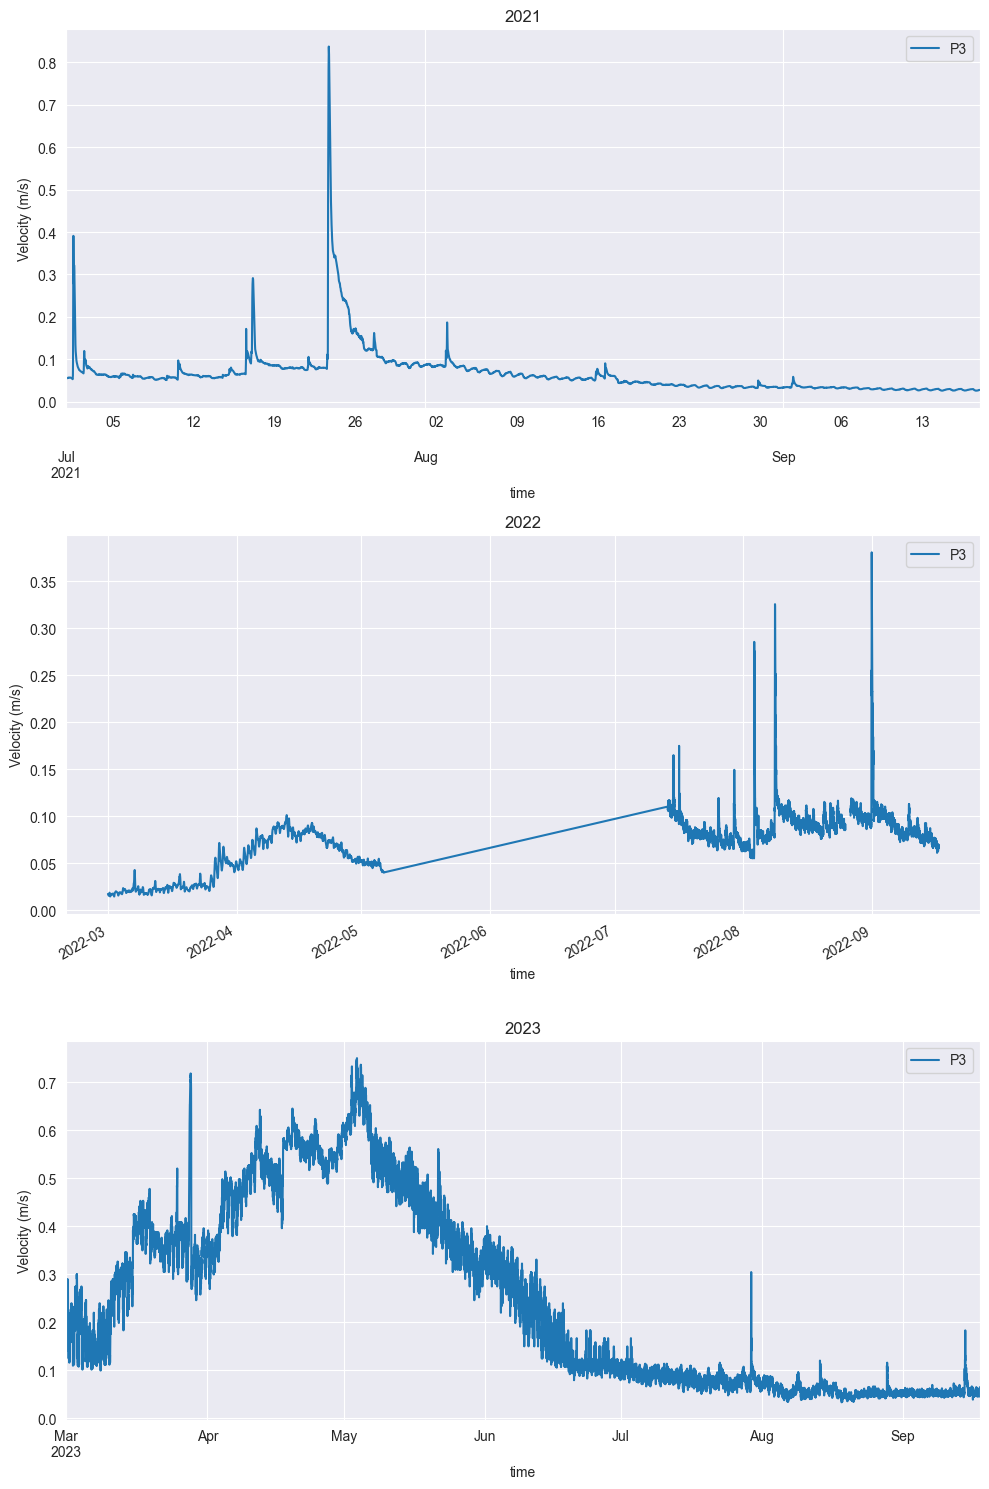

In [42]:
# plot of velocities for each piezometer in one fig
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
#velocity_2021['P2_U'].plot(ax=ax[0], label='P2')
velocity_2021['P3_U'].plot(ax=ax[0], label='P3')
#velocity_2021['P4_U'].plot(ax=ax[0], label='P4')
#velocity_2021['P6_U'].plot(ax=ax[0], label='P6')
ax[0].set_title('2021')
ax[0].set_ylabel('Velocity (m/s)')
ax[0].legend()
#velocity_2022['P2_U'].plot(ax=ax[1], label='P2')
velocity_2022['P3_U'].plot(ax=ax[1], label='P3')
#velocity_2022['P4_U'].plot(ax=ax[1], label='P4')
#velocity_2022['P6_U'].plot(ax=ax[1], label='P6')
ax[1].set_title('2022')
ax[1].set_ylabel('Velocity (m/s)')
ax[1].legend()
#velocity_2023['P2_U'].plot(ax=ax[2], label='P2')
velocity_2023['P3_U'].plot(ax=ax[2], label='P3')
#velocity_2023['P4_U'].plot(ax=ax[2], label='P4')
#velocity_2023['P6_U'].plot(ax=ax[2], label='P6')
ax[2].set_title('2023')
ax[2].set_ylabel('Velocity (m/s)')
ax[2].legend()
plt.tight_layout()
plt.show()

Reach average velocity - unsing the discharge record (U = Q/A)

In [43]:
# only using p3 to get velocity 
average_velocity_2021_test = velocity_2021[['P3']].mean(axis=1)
average_velocity_2022_test = velocity_2022[['P3']].mean(axis=1)
average_velocity_2023_test = velocity_2023[['P3']].mean(axis=1)

In [123]:
average_velocity_2021 = velocity_2021[['P3_U', 'P2_U', 'P4_U']].mean(axis=1)
average_velocity_2022= velocity_2022[['P3_U', 'P2_U', "P4_U"]].mean(axis=1)
average_velocity_2023= velocity_2023[['P3_U', 'P2_U', "P4_U"]].mean(axis=1)
average_velocity_2021

time
2021-07-01 00:00:00    0.047023
2021-07-01 00:15:00    0.047023
2021-07-01 00:30:00    0.047023
2021-07-01 00:45:00    0.047138
2021-07-01 01:00:00    0.047253
                         ...   
2021-09-17 22:45:00    0.020583
2021-09-17 23:00:00    0.020674
2021-09-17 23:15:00    0.020614
2021-09-17 23:30:00    0.020553
2021-09-17 23:45:00    0.020614
Length: 7584, dtype: float64

In [124]:
# only using p3 to get hydraulic radius
average_hydraulic_radius_2021_test = hydraulic_radius_2021[['P3']].mean(axis=1)
average_hydraulic_radius_2022_test = hydraulic_radius_2022[['P3']].mean(axis=1)
average_hydraulic_radius_2023_test = hydraulic_radius_2023[['P3']].mean(axis=1)

In [125]:
average_hydraulic_radius_2021 = hydraulic_radius_2021[['P3', 'P2', 'P4']].mean(axis=1)
average_hydraulic_radius_2022 = hydraulic_radius_2022[['P3', 'P2', 'P4']].mean(axis=1)
average_hydraulic_radius_2023 = hydraulic_radius_2023[['P3', 'P2', 'P4']].mean(axis=1)
average_hydraulic_radius_2021

time
2021-07-01 00:00:00    0.076729
2021-07-01 00:15:00    0.076729
2021-07-01 00:30:00    0.076729
2021-07-01 00:45:00    0.076748
2021-07-01 01:00:00    0.076766
                         ...   
2021-09-17 22:45:00    0.073192
2021-09-17 23:00:00    0.073227
2021-09-17 23:15:00    0.073204
2021-09-17 23:30:00    0.073180
2021-09-17 23:45:00    0.073204
Length: 7584, dtype: float64

Reach average hydraulic radius 

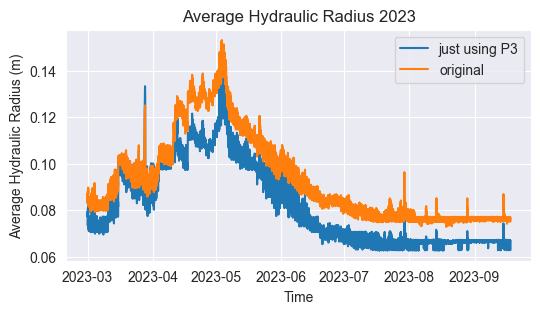

In [126]:
# plot of average hydraulic radius in time
plt.figure(figsize=(6, 3))
plt.plot(average_hydraulic_radius_2023_test, label='just using P3')
plt.plot(average_hydraulic_radius_2023, label='original')

plt.xlabel('Time')
plt.ylabel('Average Hydraulic Radius (m)')
plt.title('Average Hydraulic Radius 2023')
plt.legend()
plt.show()

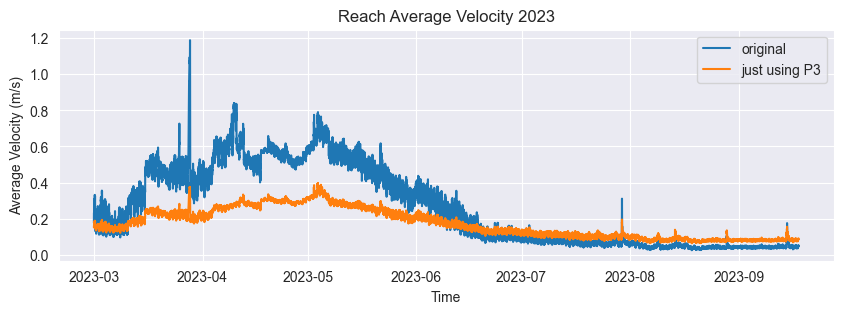

In [127]:
# plot of average hydraulic radius in time
plt.figure(figsize=(10, 3))
plt.plot(average_velocity_2023, label='original')
plt.plot(average_velocity_2023_test, label='just using P3')
plt.xlabel('Time')
plt.ylabel('Average Velocity (m/s)')
plt.title('Reach Average Velocity 2023')
plt.legend()
plt.show()

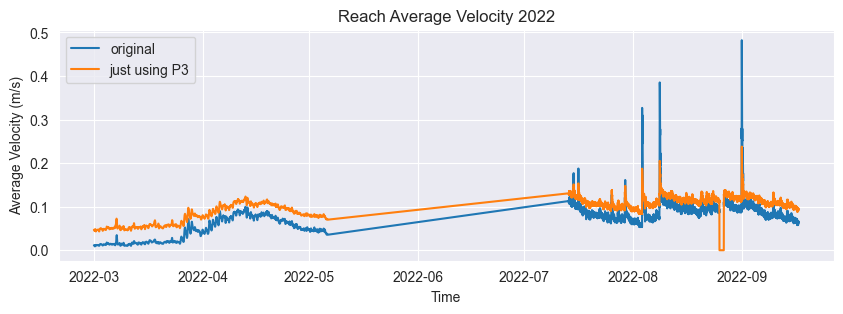

In [128]:
# plot of average hydraulic radius in time
plt.figure(figsize=(10, 3))
plt.plot(average_velocity_2022, label='original')
plt.plot(average_velocity_2022_test, label='just using P3')
plt.xlabel('Time')
plt.ylabel('Average Velocity (m/s)')
plt.title('Reach Average Velocity 2022')
plt.legend()
plt.show()

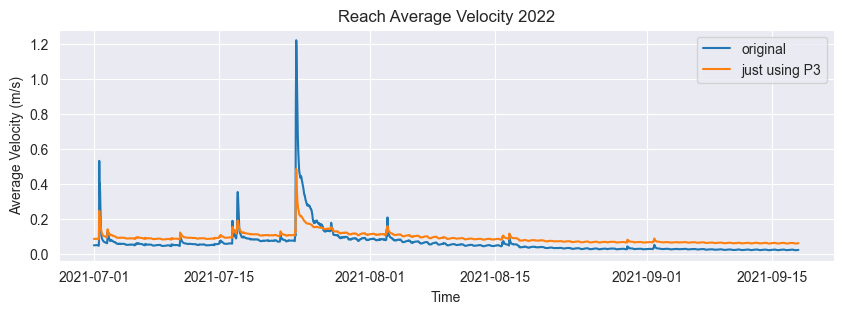

In [129]:
# plot of average hydraulic radius in time
plt.figure(figsize=(10, 3))
plt.plot(average_velocity_2021, label='original')
plt.plot(average_velocity_2021_test, label='just using P3')
plt.xlabel('Time')
plt.ylabel('Average Velocity (m/s)')
plt.title('Reach Average Velocity 2022')
plt.legend()
plt.show()

### Total shear stress as:

$\tau = g \rho s R$

In [130]:
# assigning the other variables
rho = 1000  # density of water in kg/m^3
g = 9.81  # acceleration due to gravity in m/s^2
s = 0.0945 # reach slope in m/m
# calculate shear stress for each time step
shear_stress_2021 = rho * g * s * average_hydraulic_radius_2021
shear_stress_2022 = rho * g * s * average_hydraulic_radius_2022
shear_stress_2023 = rho * g * s * average_hydraulic_radius_2023
# shear stress test
shear_stress_2021_test = rho * g * s * average_hydraulic_radius_2021_test
shear_stress_2022_test = rho * g * s * average_hydraulic_radius_2022_test
shear_stress_2023_test = rho * g * s * average_hydraulic_radius_2023_test

### Partitioned shear stress (mobile) as: 

$\tau_m = \frac{\rho  C_m  U^2}{2}$

We will be assuming $C_m$ as 0.44 as per [Yager 2012](https://doi.org/10.1029/2011WR010829)

In [131]:
mobile_shear_stress_2021 = (rho * 0.5 * average_velocity_2021**2) / 2
mobile_shear_stress_2022 = (rho * 0.5 * average_velocity_2022**2) / 2
mobile_shear_stress_2023 = (rho * 0.5 * average_velocity_2023**2) / 2
# mobile shear stress test
mobile_shear_stress_2021_test = (rho * 0.5 * average_velocity_2021_test**2) / 2
mobile_shear_stress_2022_test = (rho * 0.5 * average_velocity_2022_test**2) / 2
mobile_shear_stress_2023_test = (rho * 0.5 * average_velocity_2023_test**2) / 2

# change the column name to 'shear_stress'
mobile_shear_stress_2021.columns = ['shear_stress']
mobile_shear_stress_2022.columns = ['shear_stress']
mobile_shear_stress_2023.columns = ['shear_stress']
mobile_shear_stress_2021_test.columns = ['shear_stress']
mobile_shear_stress_2022_test.columns = ['shear_stress']
mobile_shear_stress_2023_test.columns = ['shear_stress']

mobile_shear_stress_2023


time
2023-03-01 00:00:00     7.868251
2023-03-01 00:15:00    10.557412
2023-03-01 00:30:00    13.207287
2023-03-01 00:45:00    13.546680
2023-03-01 01:00:00    10.486008
                         ...    
2023-09-17 22:45:00     0.606320
2023-09-17 23:00:00     0.509291
2023-09-17 23:15:00     0.509291
2023-09-17 23:30:00     0.717574
2023-09-17 23:45:00     0.606320
Length: 19296, dtype: float64

### Plot the shear stress record for each year

2021

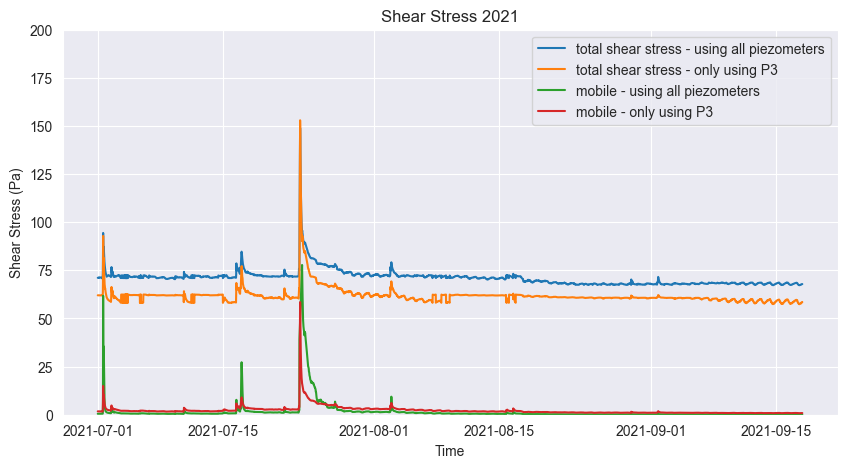

In [132]:
# 2021
mobile_shear_stress_2021 = (rho * 0.44 * average_velocity_2021**2) / 2
mobile_shear_stress_2021 = mobile_shear_stress_2021[mobile_shear_stress_2021 < 80]
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))

plt.plot(shear_stress_2021, label='total shear stress - using all piezometers')
plt.plot(shear_stress_2021_test, label='total shear stress - only using P3')
plt.plot(mobile_shear_stress_2021, label = 'mobile - using all piezometers')
plt.plot(mobile_shear_stress_2021_test, label = 'mobile - only using P3')

plt.title('Shear Stress 2021')
plt.xlabel('Time')
plt.ylabel('Shear Stress (Pa)')
plt.legend()
plt.ylim(0, 200)
plt.show()

2022

(0.0, 50.0)

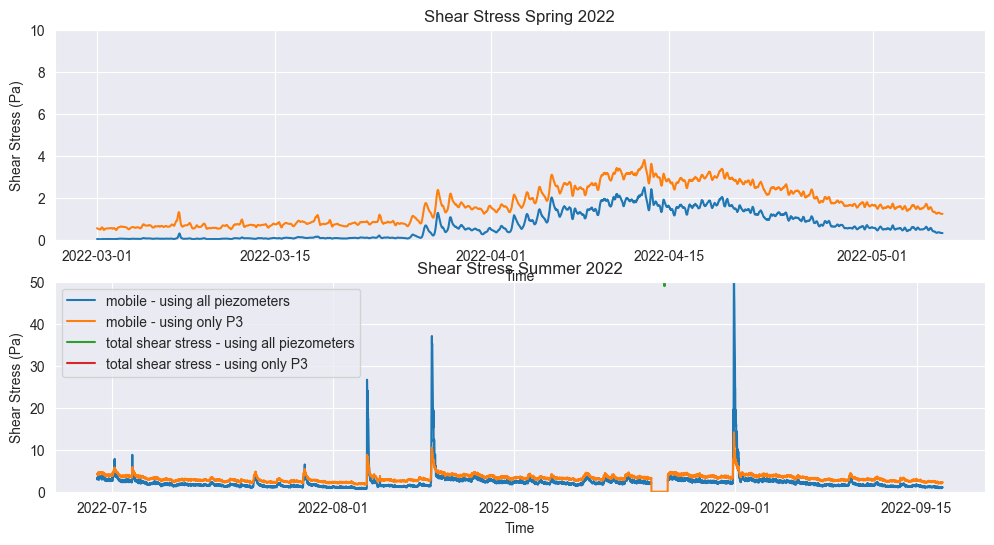

In [140]:
spring_total = shear_stress_2022['2022-03-01':'2022-06-01']
spring_total_test = shear_stress_2022_test['2022-03-01':'2022-06-01']
spring_mobile = mobile_shear_stress_2022['2022-03-01':'2022-06-01']
spring_mobile_test = mobile_shear_stress_2022_test['2022-03-01':'2022-06-01']

summer_total = shear_stress_2022['2022-06-01':'2022-09-18']
summer_total_test = shear_stress_2022_test['2022-06-01':'2022-09-18']
summer_mobile = mobile_shear_stress_2022['2022-06-01':'2022-09-18']
summer_mobile_test = mobile_shear_stress_2022_test['2022-06-01':'2022-09-18']

fig, ax = plt.subplots(figsize=(12, 6), nrows=2, sharex=False)

# spring 2022
sns.set_style('darkgrid')
ax[0].plot(spring_mobile, label='mobile - using all piezometers')
ax[0].plot(spring_mobile_test, label='mobile - using only P3')
ax[0].plot(spring_total, label='total shear stress - using all piezometers') 
ax[0].plot(spring_total_test, label='total shear stress - using only P3')
ax[0].set_title('Shear Stress Spring 2022')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Shear Stress (Pa)')
ax[0].set_ylim(0, 10)

# summer 2022

ax[1].plot(summer_mobile, label='mobile - using all piezometers ')
ax[1].plot(summer_mobile_test, label='mobile - using only P3 ')
ax[1].plot(summer_total, label='total shear stress - using all piezometers') 
ax[1].plot(summer_total_test, label='total shear stress - using only P3')
ax[1].set_title('Shear Stress Summer 2022')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].set_ylabel('Shear Stress (Pa)')
ax[1].set_ylim(0, 50)

2023

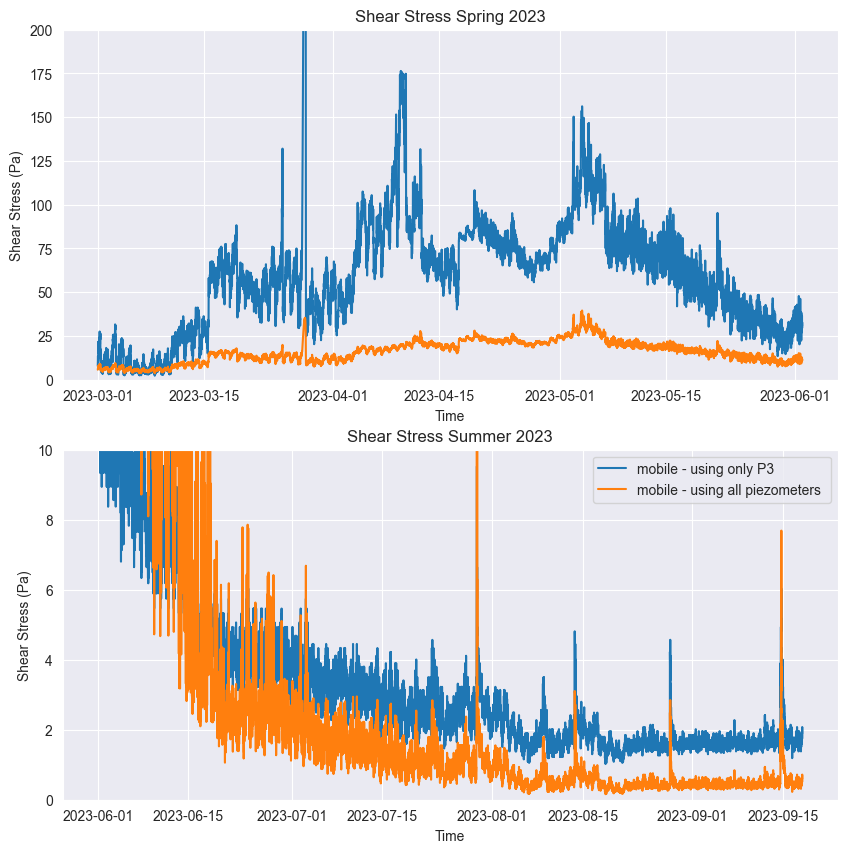

In [146]:
spring_total = shear_stress_2023['2023-03-01':'2023-06-01']
spring_total_test = shear_stress_2023_test['2023-03-01':'2023-06-01']
spring_mobile = mobile_shear_stress_2023['2023-03-01':'2023-06-01']
spring_mobile_test = mobile_shear_stress_2023_test['2023-03-01':'2023-06-01']

summer_total = shear_stress_2023['2023-06-01':'2023-09-18']
summer_total_test = shear_stress_2023_test['2023-06-01':'2023-09-18']
summer_mobile = mobile_shear_stress_2023['2023-06-01':'2023-09-18']
summer_mobile_test = mobile_shear_stress_2023_test['2023-06-01':'2023-09-18']

fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)

# spring 2023
sns.set_style('darkgrid')

ax[0].plot(spring_mobile, label='mobile - using all piezometers ')
ax[0].plot(spring_mobile_test, label='mobile - using only P3 ')
#ax[0].plot(spring_total, label='total shear stress - using all piezometers') 
#ax[0].plot(spring_total_test, label='total shear stress - using only P3')
ax[0].set_title('Shear Stress Spring 2023')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Shear Stress (Pa)')
ax[0].set_ylim(0, 200)

# summer 2023
ax[1].plot(summer_mobile_test, label='mobile - using only P3 ')
ax[1].plot(summer_mobile, label='mobile - using all piezometers ')

#ax[1].plot(summer_total, label='total shear stress - using all piezometers') 
#ax[1].plot(summer_total_test, label='total shear stress - using only P3')
ax[1].set_title('Shear Stress Summer 2023')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Shear Stress (Pa)')
ax[1].set_ylim(0, 10)

# add a legend
ax[1].legend()
plt.show()


Velocities

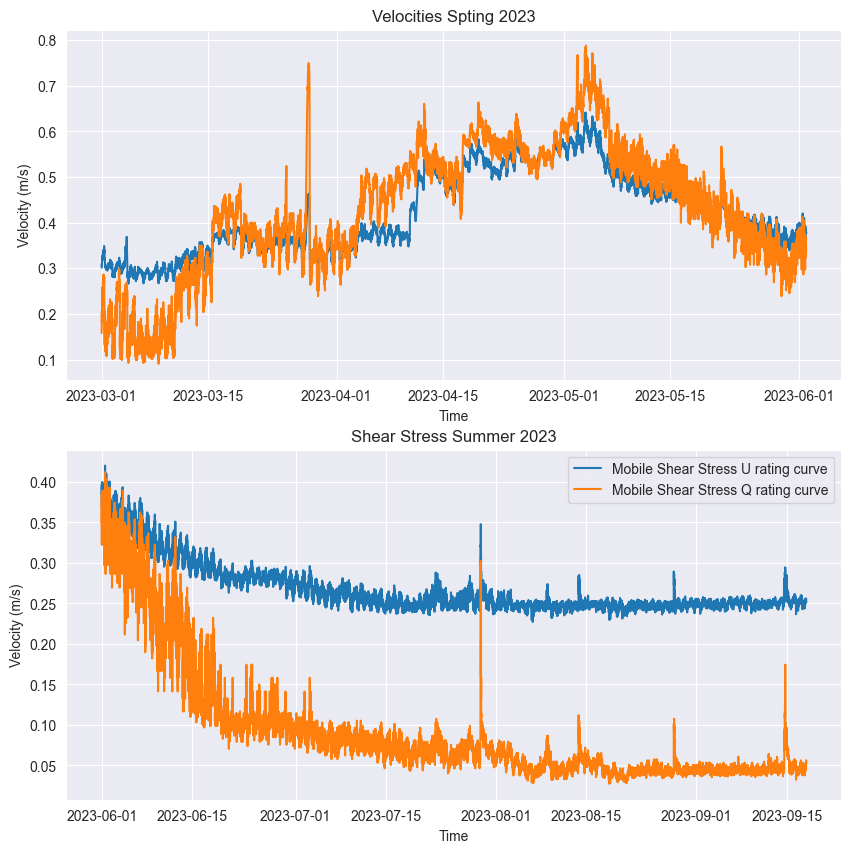

In [31]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)
# spring 2023
sns.set_style('darkgrid')
spring_mobile = average_velocity_2023['2023-03-01':'2023-06-01']
spring_mobile_U = u_velocity_2023['U']['2023-03-01':'2023-06-01']
ax[0].plot(spring_mobile_U, label='Velocity using U rating curve')
ax[0].plot(spring_mobile, label='Velocity using Q rating curve')
ax[0].set_title('Velocities Spting 2023')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Velocity (m/s)')

# summer 2023
summer_mobile = average_velocity_2023['2023-06-01':'2023-09-18']
summer_mobile_U =u_velocity_2023['U']['2023-06-01':'2023-09-18']
ax[1].plot(summer_mobile_U, label='Mobile Shear Stress U rating curve')
ax[1].plot(summer_mobile, label='Mobile Shear Stress Q rating curve')
ax[1].set_title('Shear Stress Summer 2023')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Velocity (m/s)')

# add a legend
ax[1].legend()
plt.show()

Depths

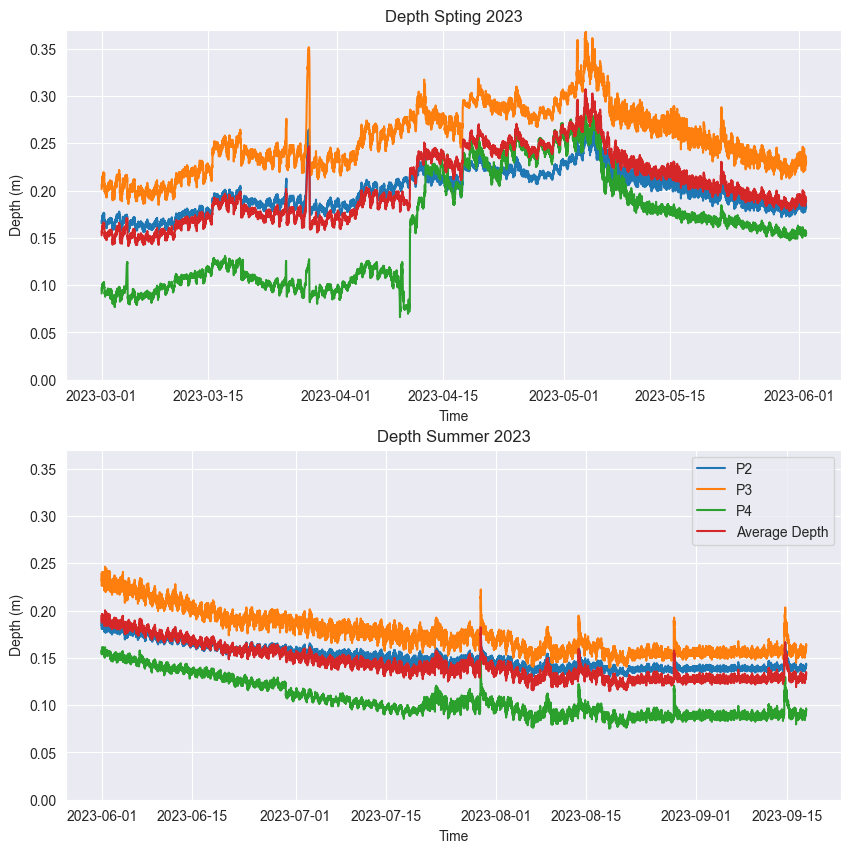

In [32]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)
# spring 2023
sns.set_style('darkgrid')
spring_depth = depth_2023['2023-03-01':'2023-06-01']
avg_spring_depth = spring_depth[['P2', 'P3', 'P4']].mean(axis=1)
ax[0].plot(spring_depth['P2'], label='P2')
ax[0].plot(spring_depth['P3'], label='P3')
ax[0].plot(spring_depth['P4'], label='P4')
ax[0].plot(avg_spring_depth, label='Average Depth')
ax[0].set_title('Depth Spting 2023')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Depth (m)')
ax[0].set_ylim(0, 0.37)

# summer 2023
summer_depth = depth_2023['2023-06-01':'2023-09-18']
avg_summer_depth = summer_depth[['P2', 'P3', 'P4']].mean(axis=1)
ax[1].plot(summer_depth['P2'], label='P2')
ax[1].plot(summer_depth['P3'], label='P3')
ax[1].plot(summer_depth['P4'], label='P4')
ax[1].plot(avg_summer_depth, label='Average Depth')
ax[1].set_title('Depth Summer 2023')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Depth (m)')
ax[1].set_ylim(0, 0.37)

# add a legend
ax[1].legend()
plt.show()

Individual Piezo Velocities

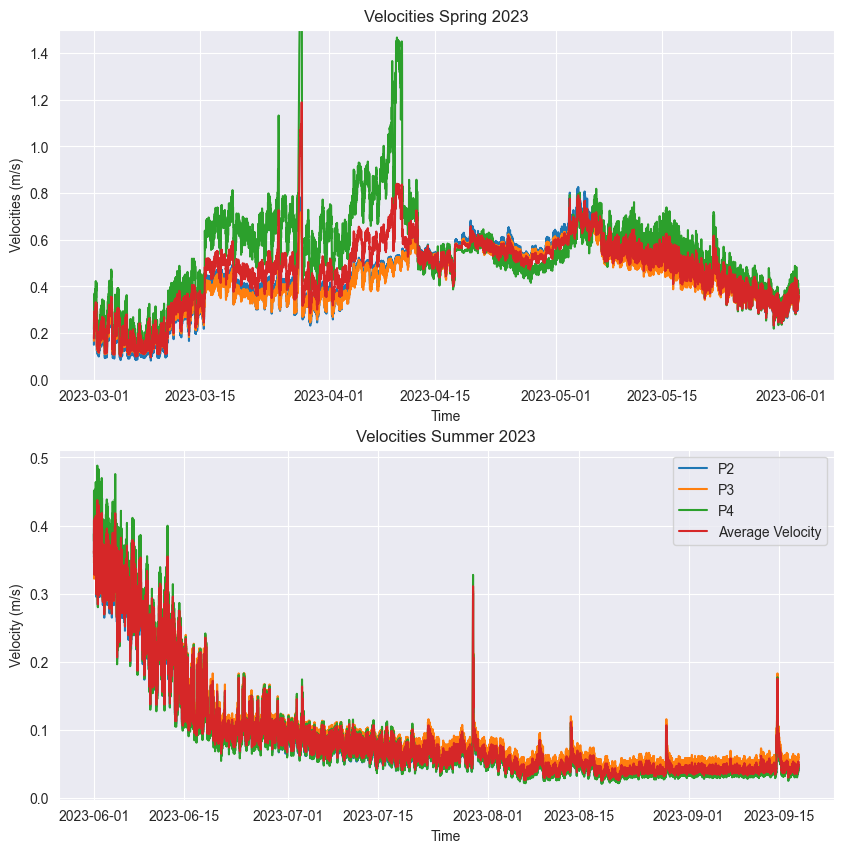

In [33]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)
# spring 2023
sns.set_style('darkgrid')
spring_velocity = velocity_2023['2023-03-01':'2023-06-01']
avg_spring_velocity = spring_velocity[['P2_U', 'P3_U', 'P4_U']].mean(axis=1)
ax[0].plot(spring_velocity['P2_U'], label='P2')
ax[0].plot(spring_velocity['P3_U'], label='P3')
ax[0].plot(spring_velocity['P4_U'], label='P4')
ax[0].plot(avg_spring_velocity, label='Average Velocity')
ax[0].set_title('Velocities Spring 2023')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Velocities (m/s)')
ax[0].set_ylim(0, 1.5)

# summer 2023
summer_velocity = velocity_2023['2023-06-01':'2023-09-18']
avg_summer_velocity = summer_velocity[['P2_U', 'P3_U', 'P4_U']].mean(axis=1)
ax[1].plot(summer_velocity['P2_U'], label='P2')
ax[1].plot(summer_velocity['P3_U'], label='P3')
ax[1].plot(summer_velocity['P4_U'], label='P4')
ax[1].plot(avg_summer_velocity, label='Average Velocity')
ax[1].set_title('Velocities Summer 2023')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Velocity (m/s)')

# add a legend
ax[1].legend()
plt.show()

Shear Stress - Total Avg vs only using P3

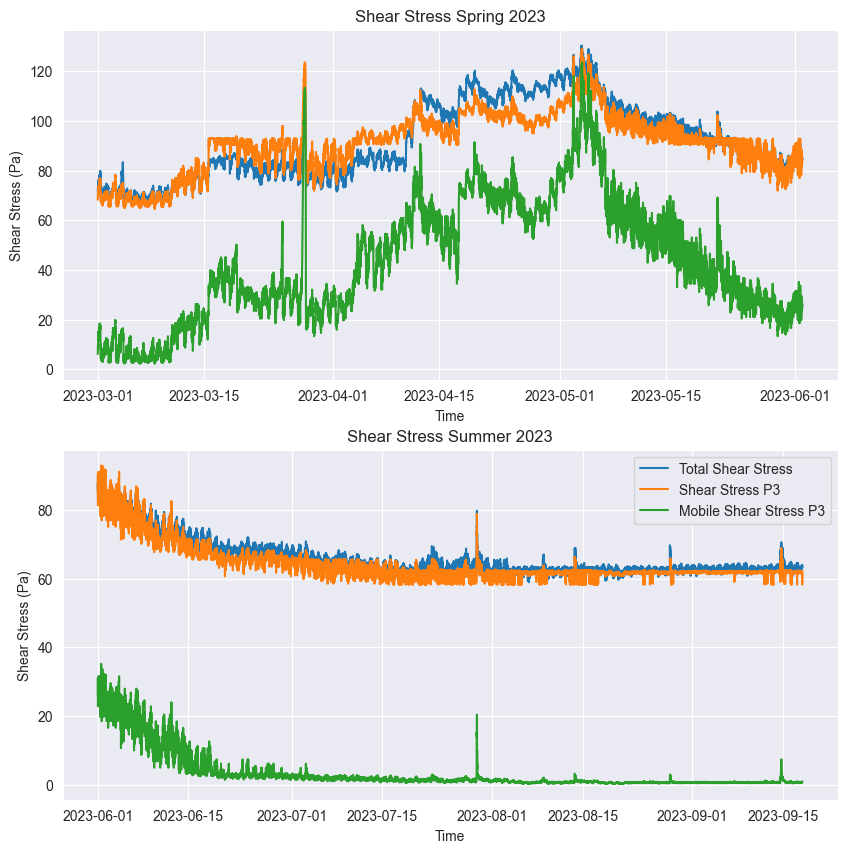

In [34]:
shear_stress_P3 = rho * g * s * hydraulic_radius_2023['P3']
mobile_shear_stress_P3 = (rho * 0.44 * velocity_2023['P3_U']**2) / 2
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=False)

# spring 2023
sns.set_style('darkgrid')
spring_total = shear_stress_2023['2023-03-01':'2023-06-01']
spring_P3 = shear_stress_P3['2023-03-01':'2023-06-01']
spring_mobile_P3 = mobile_shear_stress_P3['2023-03-01':'2023-06-01']
ax[0].plot(spring_total, label='Total Shear Stress') 
ax[0].plot(spring_P3, label='Shear Stress P3')
ax[0].plot(spring_mobile_P3, label='Mobile Shear Stress P3')
ax[0].set_title('Shear Stress Spring 2023')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Shear Stress (Pa)')

# summer 2023
summer_total = shear_stress_2023['2023-06-01':'2023-09-18']
summer_P3 = shear_stress_P3['2023-06-01':'2023-09-18']
summer_mobile_P3 = mobile_shear_stress_P3['2023-06-01':'2023-09-18']
ax[1].plot(summer_total, label='Total Shear Stress') 
ax[1].plot(summer_P3, label='Shear Stress P3')
ax[1].plot(summer_mobile_P3, label='Mobile Shear Stress P3')
ax[1].set_title('Shear Stress Summer 2023')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Shear Stress (Pa)')

# add a legend
ax[1].legend()
plt.show()

Save as csv

In [35]:
# save as csv
#mobile_shear_stress_2021.to_csv('mobile_shear_stress_2021.csv')
#mobile_shear_stress_2022.to_csv('mobile_shear_stress_2022.csv')
#mobile_shear_stress_2023.to_csv('mobile_shear_stress_2023.csv')